In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

import chugunov_indicator as chug

In [2]:
data = chug.DetonationData("./data/subch_plt08582/")

yt : [INFO     ] 2024-09-15 18:45:18,397 Parameters: current_time              = 0.40003216130915
yt : [INFO     ] 2024-09-15 18:45:18,405 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2024-09-15 18:45:18,413 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-09-15 18:45:18,413 Parameters: domain_right_edge         = [5.12000000e+09 1.02400000e+10 6.28318531e+00]


In [3]:
T, D = data.D_T_meshgrid()

In [4]:
i = 500
kwargs = {
    "abar": data.data["abar"][i],
    "zbar": data.data["zbar"][i],
    "z2bar": data.data["z2bar"][i],
    **data.data["ScreenFactors"][1]
}
kwargs

{'abar': 4.028776983649797,
 'zbar': 2.0143884920095214,
 'z2bar': 4.129496456710949,
 'z1': 2,
 'a1': 4,
 'z2': 6,
 'a2': 12}

In [5]:
F = chug.chugunov_2009(T, D, **kwargs)

In [6]:
T_border, D_border = chug.fitting.border_from_grid(T, D, F, percent=0.99875)

In [7]:
c, k = chug.parameters_from_border(T_border, D_border)
c, k

(22.5287353657504, 2.9816288026195332)

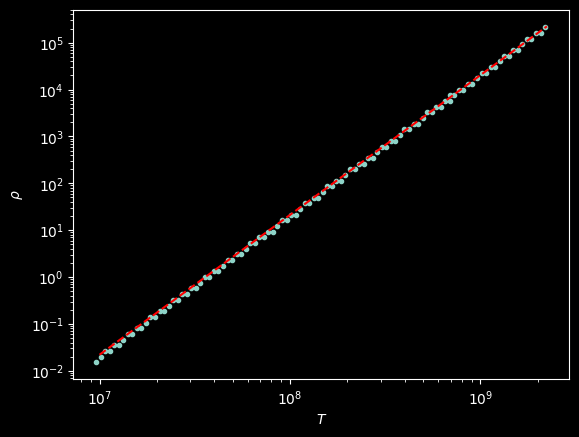

In [9]:
fig1, ax1 = plt.subplots()

chug.D_T_setup(ax1)

ax1.scatter(T_border, D_border, marker=".")
T_ = np.logspace(7, 9.35)
D_ = chug.border_func(T_, c, k)

line, = ax1.plot(T_, D_, color="red", linestyle="--")

TODO: create plots of the different variables with c and k using `linspace`

all on one subplot? grid notation